In [ ]:
import keras 
keras.__version__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/project_image_binary.zip'

-rw------- 1 root root 10125925 Apr  6 06:39 '/content/drive/My Drive/Colab Notebooks/datasets/project_image_binary.zip'


In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/project_image_binary.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/project_image_binary.zip
   creating: project_image_binary/
   creating: project_image_binary/test/
   creating: project_image_binary/test/best/
  inflating: project_image_binary/test/best/Selfie45591.jpg  
  inflating: project_image_binary/test/best/Selfie45592.jpg  
  inflating: project_image_binary/test/best/Selfie45601.jpg  
  inflating: project_image_binary/test/best/Selfie45973.jpg  
  inflating: project_image_binary/test/best/Selfie45980.jpg  
  inflating: project_image_binary/test/best/Selfie46324.jpg  
  inflating: project_image_binary/test/best/Selfie46518.jpg  
  inflating: project_image_binary/test/best/sfghjk.jpg  
  inflating: project_image_binary/test/best/trgjk,m..jpg  
  inflating: project_image_binary/test/best/unnamed (1).jpg  
 extracting: project_image_binary/test/best/unnamed (2).jpg  
  inflating: project_image_binary/test/best/unnamed (4).jpg  
  inflating: project_image_binary/test/best/unnamed.jpg  
  

In [ ]:
train_dir = 'project_image_binary/train'
test_dir = 'project_image_binary/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, 
                                   zoom_range = 0.2, horizontal_flip = True, vertical_flip = True, fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=50, class_mode ='binary')  ###### target_size ######

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=50, class_mode='binary')

Found 167 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
for X_data, y_data in train_generator:
  print(X_data.shape, y_data.shape)
  break

(50, 150, 150, 3) (50,)


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape =(150,150,3))
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':       ###### layer 이름 확인 #######
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))               ########## binary or categorical ##########

model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.000005), metrics=['accuracy'])       ########## binary or categorical ##########

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
%%time

Hist = model.fit(train_generator, steps_per_epoch=3, ########## steps 총 데이터 길이 확인 ##########
                epochs=200, validation_data=test_generator) ###### steps 총 데이터 길이 확인 ###########

Epoch 1/200
3/3 [==============================] - 39s 647ms/step - loss: 0.8989 - accuracy: 0.4733 - val_loss: 0.7775 - val_accuracy: 0.4400
Epoch 2/200
3/3 [==============================] - 3s 1s/step - loss: 0.7254 - accuracy: 0.4975 - val_loss: 0.7478 - val_accuracy: 0.5000
Epoch 3/200
3/3 [==============================] - 2s 558ms/step - loss: 0.7918 - accuracy: 0.5033 - val_loss: 0.7304 - val_accuracy: 0.5200
Epoch 4/200
3/3 [==============================] - 2s 499ms/step - loss: 0.7899 - accuracy: 0.4818 - val_loss: 0.7146 - val_accuracy: 0.5400
Epoch 5/200
3/3 [==============================] - 1s 484ms/step - loss: 0.7298 - accuracy: 0.5646 - val_loss: 0.7048 - val_accuracy: 0.5000
Epoch 6/200
3/3 [==============================] - 1s 477ms/step - loss: 0.7655 - accuracy: 0.5036 - val_loss: 0.6975 - val_accuracy: 0.5200
Epoch 7/200
3/3 [==============================] - 1s 634ms/step - loss: 0.7531 - accuracy: 0.4806 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 8/200
3/3

In [ ]:
loss, accuracy = model.evaluate(test_generator) ########### steps 총 길이 확인 #############

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

1/1 [==============================] - 0s 368ms/step - loss: 0.7600 - accuracy: 0.6600
Loss = 0.75995
Accuracy = 0.66000


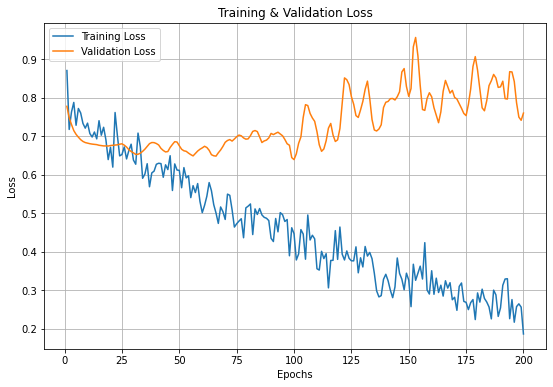

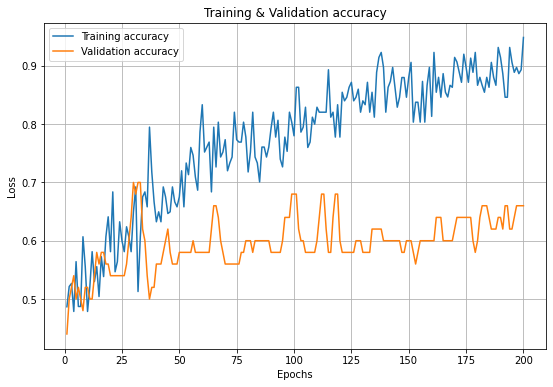

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

epochs = range(1, len(Hist.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()

# ResNet50

In [ ]:
from keras.applications import ResNet50

conv_base = ResNet50(weights = 'imagenet',
                     include_top = False,
                     input_shape = (150, 150, 3))
conv_base.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [ ]:
et_trainable = False

for layer in conv_base.layers:
    if layer.name == 'conv5_block1_1_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
from keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000003),
              metrics = ['accuracy'])

In [ ]:
%%time

Hist = model.fit(train_generator, steps_per_epoch=3, ########## steps 총 데이터 길이 확인 ##########
                epochs=200, validation_data=test_generator) ###### steps 총 데이터 길이 확인 ###########

Epoch 1/200
3/3 [==============================] - 11s 2s/step - loss: 1.6109 - accuracy: 0.4458 - val_loss: 0.6841 - val_accuracy: 0.5600
Epoch 2/200
3/3 [==============================] - 2s 667ms/step - loss: 1.0824 - accuracy: 0.6208 - val_loss: 0.6834 - val_accuracy: 0.5600
Epoch 3/200
3/3 [==============================] - 2s 564ms/step - loss: 1.1083 - accuracy: 0.5969 - val_loss: 0.6816 - val_accuracy: 0.5600
Epoch 4/200
3/3 [==============================] - 2s 603ms/step - loss: 1.4882 - accuracy: 0.4600 - val_loss: 0.6822 - val_accuracy: 0.6000
Epoch 5/200
3/3 [==============================] - 2s 560ms/step - loss: 1.3220 - accuracy: 0.5175 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 6/200
3/3 [==============================] - 2s 642ms/step - loss: 1.2600 - accuracy: 0.5475 - val_loss: 0.6840 - val_accuracy: 0.6000
Epoch 7/200
3/3 [==============================] - 2s 629ms/step - loss: 1.1587 - accuracy: 0.5508 - val_loss: 0.6853 - val_accuracy: 0.6000
Epoch 8/200
3/3

In [ ]:
loss, accuracy = model.evaluate(test_generator) ########### steps 총 길이 확인 #############

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

1/1 [==============================] - 0s 295ms/step - loss: 1.0083 - accuracy: 0.5600
Loss = 1.00825
Accuracy = 0.56000
